In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings(action='ignore')
print('Libraries have been imported')

Libraries have been imported


<div style="color:white;display:fill;border-radius:2px;background-color:#0000FF;
       font-size:150%;font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 10px;color:white;"><b><i> CHAPTER 2: Supervised Learning
</i></b></p>
</div>

X.shape: (26, 2)


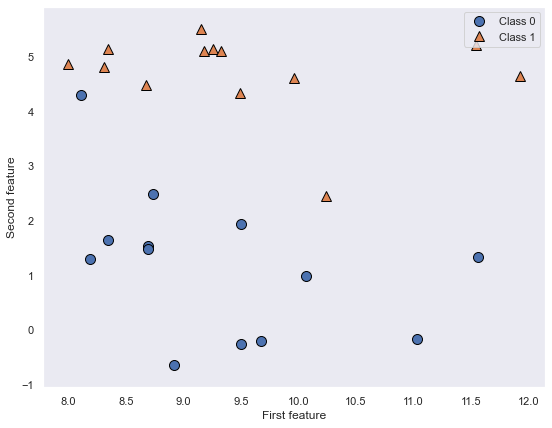

In [2]:
import mglearn
# generate dataset 
X, y = mglearn.datasets.make_forge()
plt.figure(figsize=(9,7))
sns.set(style='dark')
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=1)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))


Text(0, 0.5, 'Target')

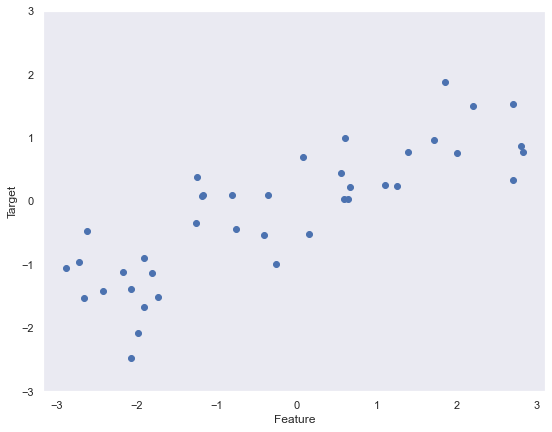

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.figure(figsize=(9,7))
sns.set(style='dark')
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


    | Breast Cancer dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
# The dataset consists of 569 data points, with 30 features each:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n{}".format(cancer.feature_names))


Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


    | Boston Housing dataset

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [9]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))


X.shape: (506, 104)


    | k-Nearest Neighbors

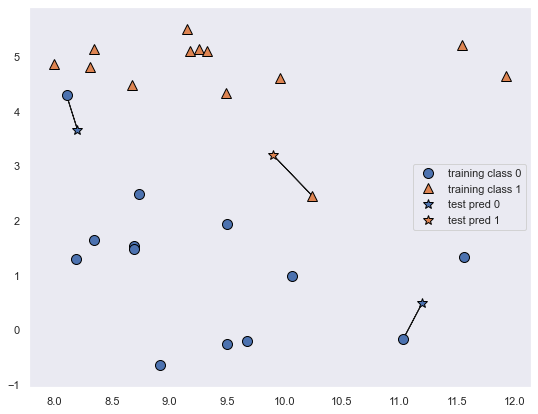

In [11]:
plt.figure(figsize=(9,7))
sns.set(style='dark')
mglearn.plots.plot_knn_classification(n_neighbors=1)

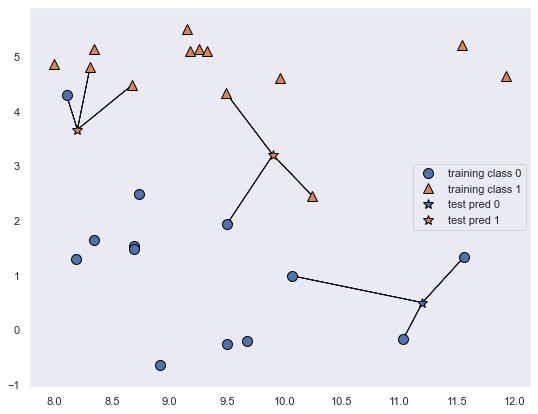

In [12]:
plt.figure(figsize=(9,7))
sns.set(style='dark')
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


    | Analyzing KNeighborsClassifier

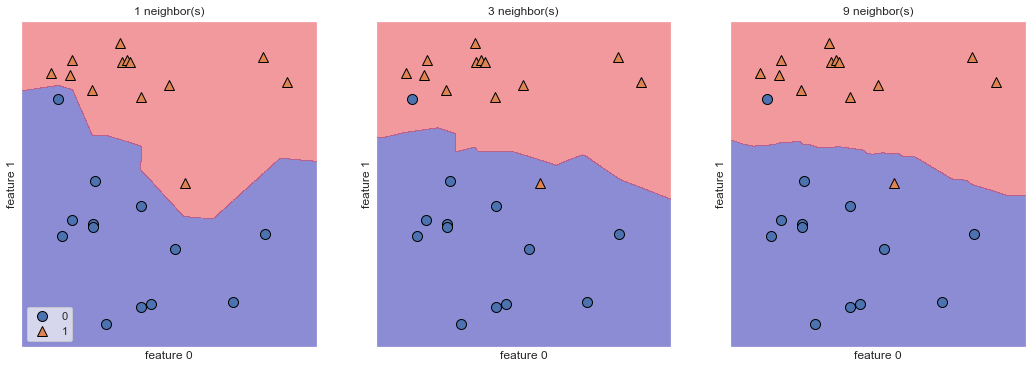

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for n_neighbors, ax in zip([1, 3, 9], axes):

    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

Figure 2-7. Comparison of training and test accuracy as a function of n_neighbors (page 54)

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)


In [19]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [20]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))

In [21]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

In [22]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

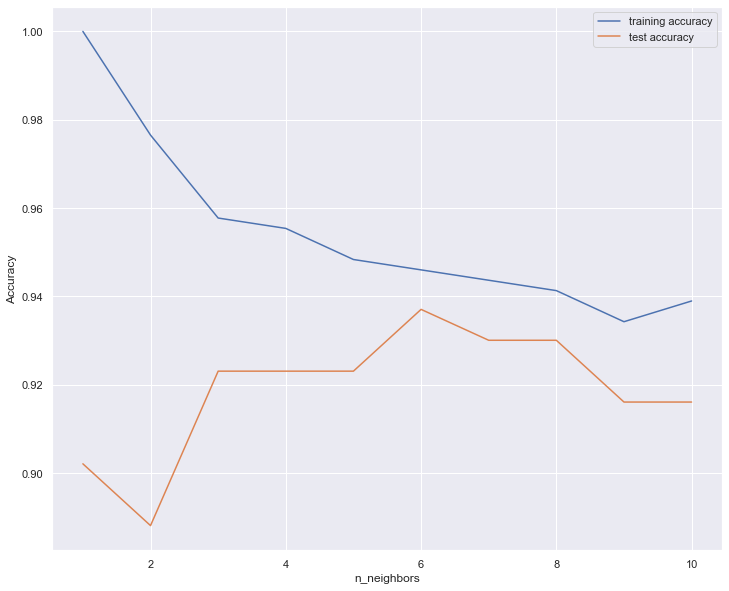

In [23]:
plt.figure(figsize=(12,10))
sns.set(style='dark')
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.grid()
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

    | k-neighbors regression

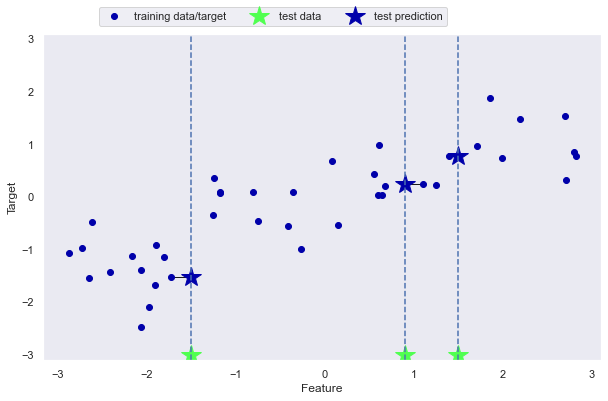

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

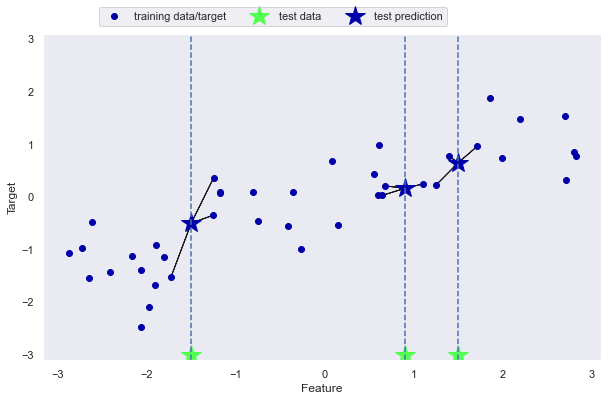

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [27]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [28]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Avalue of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses, y_train:

    | Analyzing KNeighborsRegressor

Figure 2-10. Comparing predictions made by nearest neighbors regression for different
values of n_neighbors (page 58)

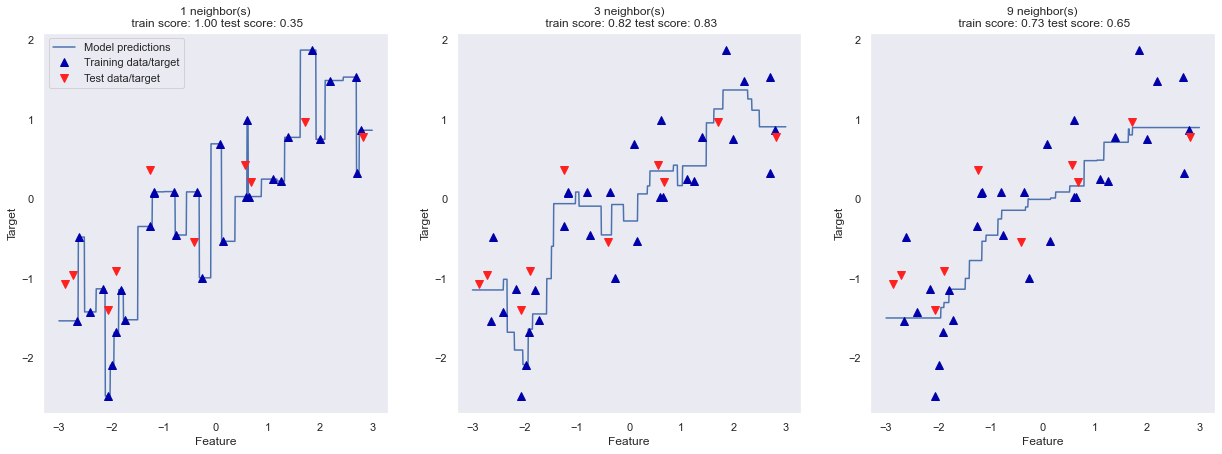

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)

 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 
 ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

# Linear Models 

Trying to learn the parameters w[0] and b on our one-dimensional wave dataset
might lead to the following line (see Figure 2-11):

w[0]: 0.393906  b: -0.031804


<Figure size 720x720 with 0 Axes>

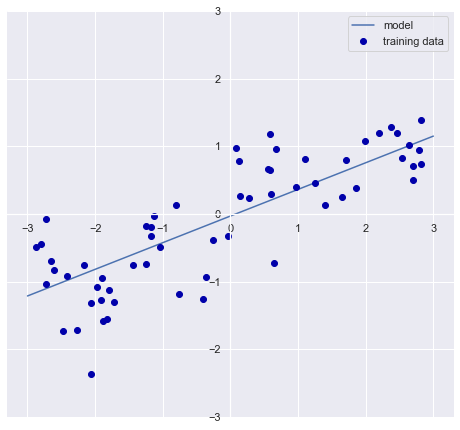

In [30]:
plt.figure(figsize=(10,10))
sns.set(style='dark')
mglearn.plots.plot_linear_regression_wave()

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

    | underfitting

In [33]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


    | overfitting

In [34]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [35]:
X_train.shape

(379, 104)

In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score( R2 score): {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score( R2 score): 0.61


When comparing training set and test set scores, we find that we predict very accurately on the training set, but the R2 on the test set is much worse:

# Ridge regression 63

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [38]:
# increasing alpha
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [39]:
# Decreasing alpha
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))


Training set score: 0.93
Test set score: 0.77


In [40]:
ridge.coef_

array([-1.41368408e+00, -1.55661895e+00, -1.46543409e+00, -1.26616071e-01,
       -7.91193605e-02,  8.33161023e+00,  2.54975060e-01, -4.94145701e+00,
        3.89862268e+00, -1.05866058e+00, -1.58433734e+00,  1.05103856e+00,
       -4.01220799e+00,  3.33720475e-01,  3.64725471e-03, -8.49295793e-01,
        7.44989267e-01, -1.43106836e+00, -1.62981017e+00, -1.40486294e+00,
       -4.47314366e-02, -1.74619880e+00, -1.46715888e+00, -1.33237111e+00,
       -1.69154625e+00, -5.06179637e-01,  2.62197591e+00, -2.09210002e+00,
        1.95074661e-01, -2.75469422e-01,  5.11308202e+00, -1.67083739e+00,
       -9.81863179e-02,  6.34477127e-01, -6.10008281e-01,  4.01805897e-02,
       -1.27661999e+00, -2.91349679e+00,  3.39544035e+00,  7.91904036e-01,
        1.35260232e+00, -4.03661265e+00,  2.32361734e+00, -3.36712926e+00,
        1.81279204e+00,  3.01566897e+00, -1.89452070e+00, -2.50844073e-01,
       -2.89543735e+00, -1.26616071e-01, -5.00217192e+00, -2.43951806e+00,
        2.85071846e+00, -

In [41]:
ridge10.coef_

array([-8.11609631e-01,  6.47608896e-01, -8.09783229e-01,  3.11334709e-01,
       -6.84623747e-01,  4.38797575e+00, -1.47554474e-01, -2.44214065e+00,
        8.45915099e-01, -1.14727508e+00, -2.33162040e+00,  1.06787015e+00,
       -3.98391025e+00, -5.98636976e-01,  2.93228193e-03, -5.21253823e-01,
        1.40339673e-01, -6.45256057e-01, -7.61400539e-01, -7.47231171e-01,
       -3.86298005e-02, -8.29808059e-01, -7.52859756e-01, -6.75605899e-01,
       -8.72001488e-01, -3.23330640e-01,  1.27336327e+00, -3.37279550e-01,
        6.30682038e-02,  2.37092897e-01,  2.09805607e+00,  1.00996768e-01,
       -2.79529662e-01,  1.73222619e-01, -3.33557850e-01, -3.74226653e-01,
        6.98414808e-01, -6.96284918e-01,  7.79521010e-01,  3.74843210e-01,
       -6.24101244e-01, -7.63657605e-01,  4.35756439e-02, -1.04000852e+00,
        4.24401576e-01,  4.78687021e-01, -3.84125445e-01, -9.93802653e-02,
       -1.30226356e+00,  3.11334709e-01, -5.92097637e-01,  6.33816542e-01,
        6.66792895e-01, -

In [42]:
ridge01.coef_

array([-2.33300720e+00, -5.44192850e+00, -6.12865463e+00, -7.78524693e-01,
        1.29152995e+00,  1.90222839e+01,  4.35864731e+00, -1.11911067e+01,
        9.55539672e+00, -7.48671406e-01, -5.33307088e-01,  6.23384946e+00,
       -2.72886731e+00,  5.86117121e+00,  2.28233711e-02, -9.01608311e-01,
        4.66756441e+00, -3.37983354e+00,  1.31611460e+00, -3.48895554e+00,
        4.41536215e-01, -3.51941085e+00, -2.52222659e+00, -2.69562070e+00,
        2.44649480e-01, -1.02306604e+00,  3.04223584e+00, -2.68804128e+00,
        4.28396019e+00, -2.94109311e+00,  8.70934702e+00, -3.13683472e+00,
       -2.91608183e-01,  2.17487375e+00,  3.62658111e+00,  2.30047840e+00,
       -2.83789461e+00, -6.17207969e+00,  7.94858912e+00,  1.65631996e+00,
        8.72779643e+00,  1.08042552e+00,  5.72208008e+00, -4.76401068e+00,
        5.07461001e+00,  8.01603635e+00, -8.44254041e+00, -6.44526450e-01,
       -1.42288399e+01, -7.78524693e-01, -1.38982595e+01, -1.59298479e+01,
        6.42600904e+00, -

In [43]:
lr.coef_

array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
       -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
        2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
       -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
        1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
        5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
       -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
       -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
       -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
        6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
       -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
       -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
       -1.23153942e+01, -1.20041365e+01, -1.77243899e+01, -3.39868183e+01,
        7.08999816e+00, -

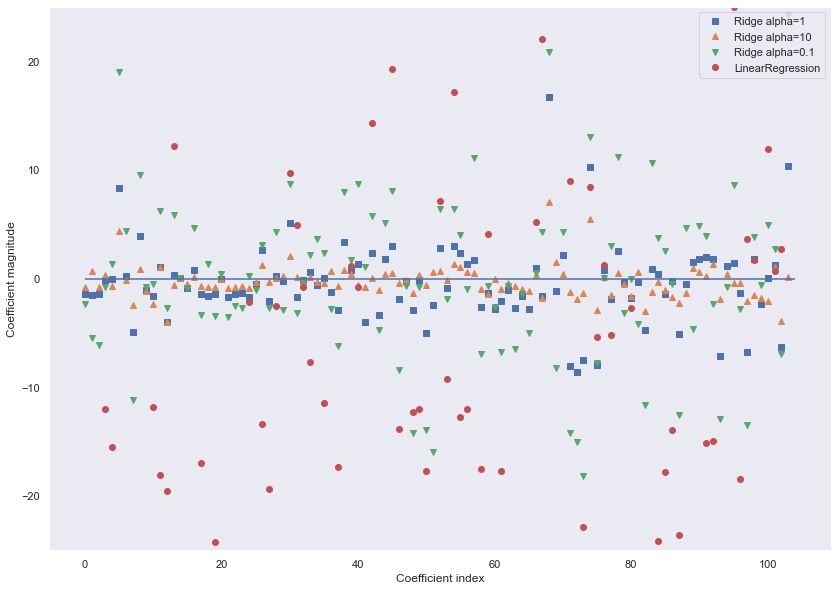

In [44]:
plt.figure(figsize=(14,10))
sns.set(style='dark')

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc=1)
